In [2]:
import torch
from transformers import AutoModel, AutoTokenizer

c:\Users\aryas\miniconda3\envs\pkmnai2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
1+1

2

In [3]:
import numpy as np
import pandas as pd

In [4]:
from tqdm import tqdm

In [5]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

sentence = "hello hi"
inputs = tokenizer(sentence, return_tensors="pt")
outputs = model(**inputs)
embedding = outputs.last_hidden_state[:, 0, :]
print(embedding)

tensor([[-2.7399e-01,  3.3162e-01, -1.1495e-01, -2.1674e-01, -2.8511e-01,
         -2.9982e-01,  3.2247e-01,  3.1581e-01,  1.8743e-01,  8.8626e-02,
         -2.0105e-02,  7.4102e-02,  2.3955e-01,  3.9934e-01, -1.0891e-01,
         -9.2823e-02, -2.1650e-01,  5.1228e-01,  2.1481e-01,  1.7406e-01,
         -2.3057e-01, -2.6195e-01, -1.6170e-01, -1.9570e-01, -8.0080e-02,
         -2.5900e-01, -1.7916e-01, -1.6859e-02,  3.9020e-01, -2.8445e-02,
         -1.4440e-03,  2.8322e-01, -1.7490e-01, -5.6523e-02, -1.8404e-01,
          1.5820e-01,  1.1796e-01,  3.5101e-01, -3.5980e-01,  9.8555e-02,
         -3.9047e-01, -1.3655e-01, -1.0173e-01,  1.5543e-01, -5.9851e-02,
         -5.8501e-01, -2.5932e+00, -1.7669e-01, -2.6588e-01, -5.0043e-01,
          7.1172e-02, -2.4193e-02, -5.2199e-03, -1.3609e-01,  1.0551e-01,
          1.7543e-01, -4.8413e-01,  2.7839e-01, -2.8150e-01,  6.8104e-02,
         -5.6892e-02, -1.9888e-01,  5.0943e-03, -3.7501e-02,  2.6670e-02,
          1.1218e-01,  1.6821e-01,  6.

In [6]:
df = pd.read_csv('move_data.csv')
moves_descriptions = df['effect']

In [7]:
move_text = moves_descriptions.values

In [8]:
sentences =  list(move_text[:500])
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
outputs = model(**inputs)
embeddings = outputs.last_hidden_state[:, 0, :]

In [41]:
embeddings.shape

torch.Size([100, 768])

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [45]:
scaler = StandardScaler()
emb_scaled = scaler.fit_transform(embeddings.detach().numpy())
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(emb_scaled)

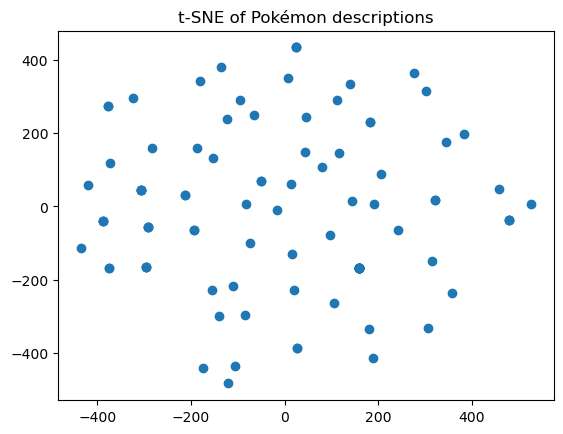

In [49]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE of Pokémon descriptions')
plt.show()